In [1]:
from matplotlib import pyplot as plt
import scipy as sp
plt.style.use('ggplot')
def identity(*args, **kwargs): pass
debug_print = identity

In [2]:
n = []
std = []
fast = []
blas = []
with open("results.txt", "r") as f:
    for line in f:
        line = line.strip().split(':')
        if line[0].startswith("Row"):
            debug_print("Rows:", line)
            n.append(float(line[1]))
        elif line[0].startswith("Std"):
            debug_print("Std:", line)
            std.append(float(line[1]))
        elif line[0].startswith("Fast"):
            debug_print("Fast:", line)
            fast.append(float(line[1]))
        elif line[0].startswith("BLAS"):
            debug_print("Blas:", line)
            blas.append(float(line[1]))
        else:
            debug_print("None:", line)

n = sp.array(n)
std = sp.array(std)
fast = sp.array(fast)
blas = sp.array(blas)

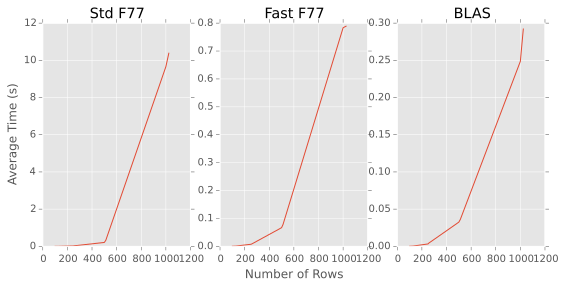

In [3]:
indresfig, indaxes = plt.subplots(1, 3)
indaxes[0].set_title("Std F77")
indaxes[0].set_ylabel("Average Time (s)")
indaxes[0].plot(n, std)
indaxes[1].set_title("Fast F77")
indaxes[1].set_xlabel("Number of Rows")
indaxes[1].plot(n, fast)
indaxes[2].set_title("BLAS")
indaxes[2].plot(n, blas)
indresfig.set_figwidth(indresfig.get_figwidth() * 1.5)
indresfig.savefig("Individual.pdf")

In [4]:
# turn seconds into FLOPS
nops = 2*(n**3)
debug_print(n)
debug_print(nops)
std = nops/std
fast = nops/fast
blas = nops/blas

# turn FLOPS into % of peak
cycles_per_second = 2e9
cores_per_cpu = 4
n_cpu = 1
instructions_per_cycle = 4
peak_flops = cycles_per_second * instructions_per_cycle * cores_per_cpu * n_cpu

std = std/peak_flops
fast = fast/peak_flops
blas = blas/peak_flops

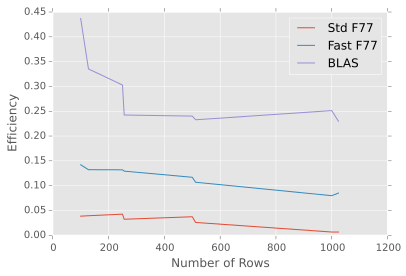

In [5]:
allresults = plt.figure()
allax = allresults.add_subplot(1,1,1)
allax.set_xlabel("Number of Rows")
allax.set_ylabel("Efficiency")
allax.plot(n, std, label="Std F77")
allax.plot(n, fast, label="Fast F77")
allax.plot(n, blas, label="BLAS")
allax.legend(loc='best')
allresults.savefig('All.pdf')

In [6]:
with open('results_table.txt', 'w') as f:
    print("N", "Std F77 (s)", "Fast F77 (s)", "BLAS (s)", sep='\t', file=f)
    for (i, s, fa, b) in zip(n, std, fast, blas):
        print(int(i), s, fa, b, sep='\t', file=f)